<a href="https://colab.research.google.com/github/jgamel/learn_n_dev/blob/python_modeling_forecasting/KL_Divergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculate the KL Divergence for Machine Learning

It is often desirable to quantify the difference between probability distributions for a given random variable.

This occurs frequently in machine learning, when we may be interested in calculating the difference between an actual and observed probability distribution.

This can be achieved using techniques from information theory, such as the Kullback-Leibler Divergence (KL divergence), or relative entropy, and the Jensen-Shannon Divergence that provides a normalized and symmetrical version of the KL divergence. These scoring methods can be used as shortcuts in the calculation of other widely used methods, such as mutual information for feature selection prior to modeling, and cross-entropy used as a loss function for many different classifier models.

In this post, you will discover how to calculate the divergence between probability distributions.

* Statistical distance is the general idea of calculating the difference between statistical objects like different probability distributions for a random variable.
* Kullback-Leibler divergence calculates a score that measures the divergence of one probability distribution from another.
* Jensen-Shannon divergence extends KL divergence to calculate a symmetrical score and distance measure of one probability distribution from another.

### Statistical Distance

There are many situations where we may want to compare two probability distributions.

Specifically, we may have a single random variable and two different probability distributions for the variable, such as a true distribution and an approximation of that distribution.

In situations like this, it can be useful to quantify the difference between the distributions. Generally, this is referred to as the problem of calculating the statistical distance between two [statistical objects](https://en.wikipedia.org/wiki/Statistical_distance), e.g. probability distributions.

One approach is to calculate a distance measure between the two distributions. This can be challenging as it can be difficult to interpret the measure.

Instead, it is more common to calculate a [divergence](https://en.wikipedia.org/wiki/Divergence_(statistics)) between two probability distributions. A divergence is like a measure but is not symmetrical. This means that a divergence is a scoring of how one distribution differs from another, where calculating the divergence for distributions P and Q would give a different score from Q and P.

Divergence scores are an important foundation for many different calculations in information theory and more generally in machine learning. For example, they provide shortcuts for calculating scores such as mutual information (information gain) and cross-entropy used as a loss function for classification models.

Divergence scores are also used directly as tools for understanding complex modeling problems, such as approximating a target probability distribution when optimizing generative adversarial network (GAN) models.

Two commonly used divergence scores from information theory are Kullback-Leibler Divergence and Jensen-Shannon Divergence.

We will take a closer look at both of these scores in the following section.

### Kullback-Leibler Divergence

The [Kullback-Leibler Divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) score, or KL divergence score, quantifies how much one probability distribution differs from another probability distribution.

The KL divergence between two distributions Q and P is often stated using the following notation:

```KL(P || Q)```

Where the “||” operator indicates “divergence” or Ps divergence from Q.

KL divergence can be calculated as the negative sum of probability of each event in P multiplied by the log of the probability of the event in Q over the probability of the event in P.

```KL(P || Q) = – sum x in X P(x) * log(Q(x) / P(x))```

The value within the sum is the divergence for a given event.

This is the same as the positive sum of probability of each event in P multiplied by the log of the probability of the event in P over the probability of the event in Q (e.g. the terms in the fraction are flipped). This is the more common implementation used in practice.

```KL(P || Q) = sum x in X P(x) * log(P(x) / Q(x))```

The intuition for the KL divergence score is that when the probability for an event from P is large, but the probability for the same event in Q is small, there is a large divergence. When the probability from P is small and the probability from Q is large, there is also a large divergence, but not as large as the first case.

It can be used to measure the divergence between discrete and continuous probability distributions, where in the latter case the integral of the events is calculated instead of the sum of the probabilities of the discrete events.

The log can be base-2 to give units in “bits,” or the natural logarithm base-e with units in “nats.” When the score is 0, it suggests that both distributions are identical, otherwise the score is positive.

Importantly, the KL divergence score is not symmetrical, for example:

```KL(P || Q) != KL(Q || P)```

It is named for the two authors of the method Solomon Kullback and Richard Leibler, and is sometimes referred to as “relative entropy.”

If we are attempting to approximate an unknown probability distribution, then the target probability distribution from data is P and Q is our approximation of the distribution.

In this case, the KL divergence summarizes the number of additional bits (i.e. calculated with the base-2 logarithm) required to represent an event from the random variable. The better our approximation, the less additional information is required.

We can make the KL divergence concrete with a worked example.

Consider a random variable with three events as different colors. We may have two different probability distributions for this variable; for example:

```
...
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
```

We can plot a bar chart of these probabilities to compare them directly as probability histograms.

The complete example is listed below.


P=1.000 Q=1.000


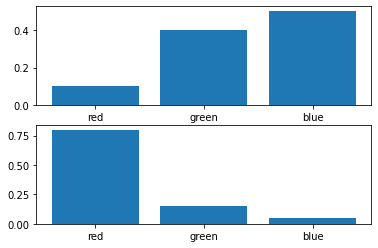

In [1]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

Running the example creates a histogram for each probability distribution, allowing the probabilities for each event to be directly compared.

We can see that indeed the distributions are different.

Next, we can develop a function to calculate the KL divergence between the two distributions.

We will use log base-2 to ensure the result has units in bits.

```
# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
```

We can then use this function to calculate the KL divergence of P from Q, as well as the reverse, Q from P.

```
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)
```
Tying this all together, the complete example is listed below.

In [2]:
# example of calculating the kl divergence between two mass functions
from math import log2

# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.927 bits
KL(Q || P): 2.022 bits


Running the example first calculates the divergence of P from Q as just under 2 bits, then Q from P as just over 2 bits.

This is intuitive if we consider P has large probabilities when Q is small, giving P less divergence than Q from P as Q has more small probabilities when P has large probabilities. There is more divergence in this second case.

If we change log2() to the natural logarithm log() function, the result is in nats, as follows:

In [8]:
# example of calculating the kl divergence between two mass functions
from math import log

# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log(p[i]/q[i]) for i in range(len(p)))

# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.336 bits
KL(Q || P): 1.401 bits


The SciPy library provides the kl_div() function for calculating the KL divergence, although with a different definition as defined here. It also provides the rel_entr() function for calculating the relative entropy, which matches the definition of KL divergence here. This is odd as “relative entropy” is often used as a synonym for “KL divergence.”

Nevertheless, we can calculate the KL divergence using the rel_entr() SciPy function and confirm that our manual calculation is correct.

The rel_entr() function takes lists of probabilities across all events from each probability distribution as arguments and returns a list of divergences for each event. These can be summed to give the KL divergence. The calculation uses the natural logarithm instead of log base-2 so the units are in nats instead of bits.

The complete example using SciPy to calculate KL(P || Q) and KL(Q || P) for the same probability distributions used above is listed below:



In [9]:
# example of calculating the kl divergence (relative entropy) with scipy
from scipy.special import rel_entr
# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = rel_entr(p, q)
print('KL(P || Q): %.3f nats' % sum(kl_pq))
# calculate (Q || P)
kl_qp = rel_entr(q, p)
print('KL(Q || P): %.3f nats' % sum(kl_qp))

KL(P || Q): 1.336 nats
KL(Q || P): 1.401 nats


Running the example, we can see that the calculated divergences match our manual calculation of about 1.3 nats and about 1.4 nats for KL(P || Q) and KL(Q || P) respectively.

### Jensen-Shannon Divergence

The [Jensen-Shannon divergence](https://en.wikipedia.org/wiki/Jensen%E2%80%93Shannon_divergence), or JS divergence for short, is another way to quantify the difference (or similarity) between two probability distributions.

It uses the KL divergence to calculate a normalized score that is symmetrical. This means that the divergence of P from Q is the same as Q from P, or stated formally:

```JS(P || Q) == JS(Q || P)```

The JS divergence can be calculated as follows:

```JS(P || Q) = 1/2 * KL(P || M) + 1/2 * KL(Q || M)```

Where M is calculated as:

```M = 1/2 * (P + Q)```

And KL() is calculated as the KL divergence described in the previous section.

It is more useful as a measure as it provides a smoothed and normalized version of KL divergence, with scores between 0 (identical) and 1 (maximally different), when using the base-2 logarithm.

The square root of the score gives a quantity referred to as the Jensen-Shannon distance, or JS distance for short.

We can make the JS divergence concrete with a worked example.

First, we can define a function to calculate the JS divergence that uses the kl_divergence() function prepared in the previous section.

```
# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate the js divergence
def js_divergence(p, q):
	m = 0.5 * (p + q)
	return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)
```

We can then test this function using the same probability distributions used in the previous section.

First, we will calculate the JS divergence score for the distributions, then calculate the square root of the score to give the JS distance between the distributions. For example:

```
...
# calculate JS(P || Q)
js_pq = js_divergence(p, q)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))
```

This can then be repeated for the reverse case to show that the divergence is symmetrical, unlike the KL divergence.

```
...
# calculate JS(Q || P)
js_qp = js_divergence(q, p)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))
```
Tying this together, the complete example of calculating the JS divergence and JS distance is listed below.

In [10]:
# example of calculating the js divergence between two mass functions
from math import log2
from math import sqrt
from numpy import asarray

# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate the js divergence
def js_divergence(p, q):
	m = 0.5 * (p + q)
	return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

# define distributions
p = asarray([0.10, 0.40, 0.50])
q = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq = js_divergence(p, q)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))
# calculate JS(Q || P)
js_qp = js_divergence(q, p)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))

JS(P || Q) divergence: 0.420 bits
JS(P || Q) distance: 0.648
JS(Q || P) divergence: 0.420 bits
JS(Q || P) distance: 0.648


Running the example shows that the JS divergence between the distributions is about 0.4 bits and that the distance is about 0.6.

We can see that the calculation is symmetrical, giving the same score and distance measure for JS(P || Q) and JS(Q || P).



The SciPy library provides an implementation of the JS distance via the jensenshannon() function.

It takes arrays of probabilities across all events from each probability distribution as arguments and returns the JS distance score, not a divergence score. We can use this function to confirm our manual calculation of the JS distance.

The complete example is listed below.

In [11]:
# calculate the jensen-shannon distance metric
from scipy.spatial.distance import jensenshannon
from numpy import asarray
# define distributions
p = asarray([0.10, 0.40, 0.50])
q = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq = jensenshannon(p, q, base=2)
print('JS(P || Q) Distance: %.3f' % js_pq)
# calculate JS(Q || P)
js_qp = jensenshannon(q, p, base=2)
print('JS(Q || P) Distance: %.3f' % js_qp)

JS(P || Q) Distance: 0.648
JS(Q || P) Distance: 0.648


Running the example, we can confirm the distance score matches our manual calculation of 0.648, and that the distance calculation is symmetrical as expected.